## Understanding the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
#Description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
housing.target_names

['MedHouseVal']

## Preparing the Dataset

In [11]:
dataset = pd.DataFrame(housing.data)

In [12]:
dataset.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

In [13]:
df = dataset.copy()

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
df['Price'] = housing.target

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [18]:
#Analysis of Data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
#Finding Null Values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## Exploratory Data Analysis

In [21]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [22]:
# DO NOT RUN (very heavy)

# import seaborn as sns
# sns.pairplot(dataset)

## Analyzing The Correlated Features

<Axes: xlabel='MedInc', ylabel='Price'>

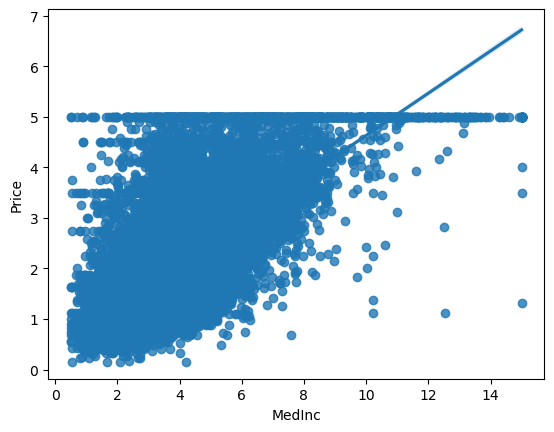

In [24]:
# Positive Correlation

import seaborn as sns
sns.regplot(x="MedInc", y="Price", data=df)

<Axes: xlabel='Population', ylabel='Price'>

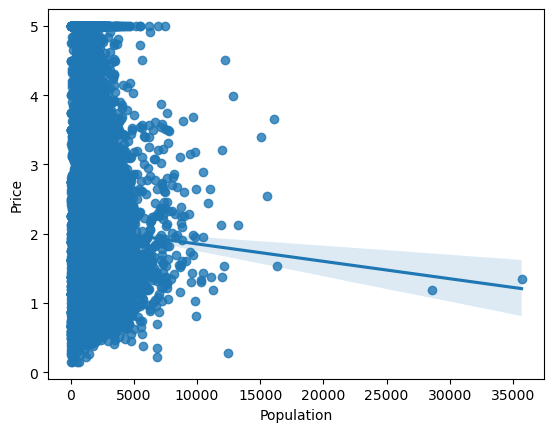

In [25]:
# Negative Correlation

import seaborn as sns
sns.regplot(x="Population", y="Price", data=df)

<Axes: xlabel='Latitude', ylabel='Price'>

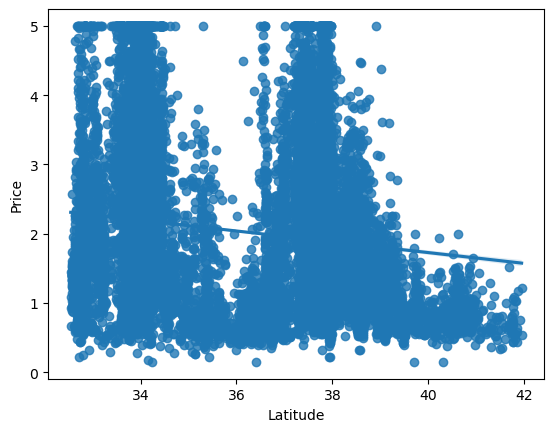

In [26]:
# No Correlation

import seaborn as sns
sns.regplot(x="Latitude", y="Price", data=df)

## Splitting features into Independant and Dependant Category

In [28]:
# x - Dependant, y - Independant

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [29]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [31]:
# Training Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 49)

In [32]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19696,3.2465,5.0,4.744376,1.026585,1245.0,2.546012,39.11,-121.62
15698,14.2959,52.0,8.172727,0.872727,304.0,2.763636,37.79,-122.46
4002,8.3912,25.0,7.843416,1.016607,2519.0,2.988138,34.18,-118.66
14832,2.0520,31.0,3.812268,1.020446,1581.0,2.938662,32.67,-117.09
254,2.4338,49.0,4.703934,1.031056,1621.0,3.356108,37.77,-122.20


In [33]:
x_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5866,4.0313,45.0,4.426471,0.931373,557.0,2.730392,34.19,-118.35
18301,6.4588,35.0,5.586605,0.983834,949.0,2.191686,37.41,-122.14
16999,8.9083,15.0,6.947712,1.013072,905.0,2.957516,37.54,-122.27
20415,3.2176,16.0,4.226716,1.004902,1877.0,2.300245,34.17,-118.84
6606,4.0714,42.0,5.843501,1.092838,1012.0,2.684350,34.19,-118.13


In [34]:
y_train.head()

19696    0.97200
15698    5.00001
4002     4.19000
14832    1.08900
254      1.02400
Name: Price, dtype: float64

In [35]:
y_test.head()

5866     2.09100
18301    4.37100
16999    5.00001
20415    1.87500
6606     2.34000
Name: Price, dtype: float64

## Standardizing the Dataset

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [39]:
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

In [40]:
x_train

array([[-3.33531651e-01, -1.87561834e+00, -2.64846290e-01, ...,
        -4.67220631e-02,  1.62554056e+00, -1.02286303e+00],
       [ 5.47897495e+00,  1.85791439e+00,  1.04349914e+00, ...,
        -2.60916782e-02,  1.00756242e+00, -1.44282254e+00],
       [ 2.37282369e+00, -2.86881010e-01,  9.17825769e-01, ...,
        -4.80935183e-03, -6.82514185e-01,  4.56994280e-01],
       ...,
       [-8.90615700e-01, -1.28007276e-01, -6.53328598e-02, ...,
         4.99899251e-03,  8.39022922e-01, -6.97894364e-01],
       [-9.22863774e-02,  1.85791439e+00,  9.52336473e-02, ...,
        -2.64300368e-02,  9.93517459e-01, -1.40782591e+00],
       [-1.78242500e-01,  1.85791439e+00, -3.14952643e-01, ...,
        -1.15272957e-01,  1.04969729e+00, -1.34783170e+00]])

In [41]:
x_test

array([[ 0.07931024,  1.30185632, -0.38616714, ..., -0.02924317,
        -0.67783253,  0.61197934],
       [ 1.35628996,  0.50748766,  0.05656952, ..., -0.08031158,
         0.82965962, -1.28283796],
       [ 2.64484273, -1.08124968,  0.57600249, ..., -0.00771219,
         0.8905211 , -1.3478317 ],
       ...,
       [-1.22434008, -1.08124968, -0.53941242, ..., -0.04248126,
         0.87647614, -0.63790015],
       [-0.08181804,  1.85791439,  0.08314778, ..., -0.01849705,
        -0.78082889,  0.63197741],
       [-0.92522961,  0.74579826,  0.04541536, ...,  0.10945146,
        -0.89318855,  1.67687666]])

## Model Training

In [43]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [44]:
regression.fit(x_train, y_train)

LinearRegression()

In [45]:
regression.coef_

array([ 0.82357744,  0.120622  , -0.25904685,  0.3055246 ,  0.00375408,
       -0.04813311, -0.91853293, -0.88998166])

In [46]:
regression.intercept_

2.074620208333342

In [47]:
# Parameters that the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [48]:
# Prediction with Test Data
reg_pred = regression.predict(x_test) 

In [49]:
reg_pred

array([2.37404033, 3.55206734, 4.30289998, ..., 0.78812817, 2.28221996,
       0.74699716])

## Assumptions

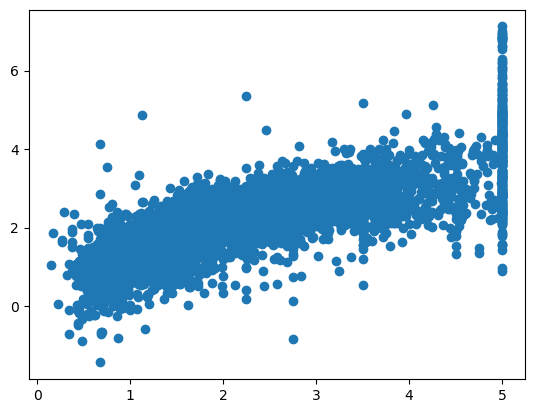

In [51]:
# Scatter Plot for Prediction
plt.scatter(y_test, reg_pred)

In [52]:
# Residual(error)
residuals = y_test - reg_pred

In [53]:
residuals

5866    -0.283040
18301    0.818933
16999    0.697110
20415   -0.165392
6606     0.116913
           ...   
1635    -0.073329
19740   -0.066527
19660    0.142872
5100    -0.856220
12416   -0.061997
Name: Price, Length: 6192, dtype: float64

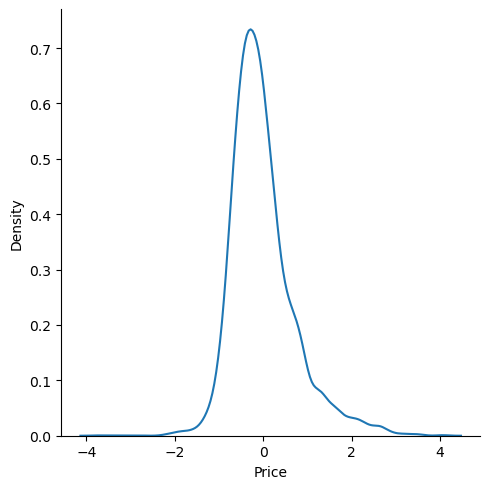

In [54]:
## Plot this residuals 
sns.displot(residuals, kind="kde")

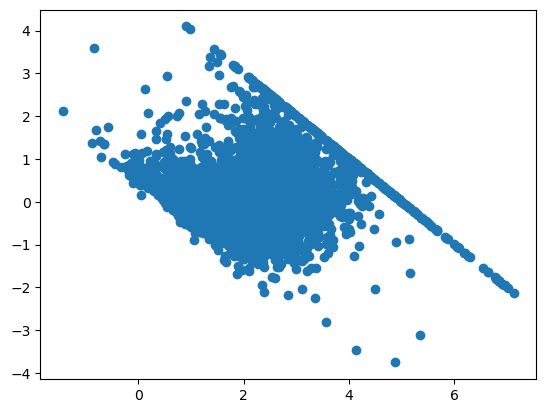

In [55]:
# Scatter plot wrt prediction and residuals
plt.scatter(reg_pred, residuals)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))

print(mean_squared_error(y_test, reg_pred))

0.5312122820929548
0.5220888236217667


## R Square and Adjusted R Square

In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
score

0.6023738790841083

In [59]:
adjusted_r2 = 1 - ((1 - score) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1)
adjusted_r2

0.6018594024599248

## New Data Prediction

In [61]:
housing.data[0].reshape(1, -1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [62]:
# Transformation of New Data
Transformed_New_Data = scaler.transform(housing.data[0].reshape(1, -1))

C:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
regression.predict(Transformed_New_Data)

array([4.13812003])

In [64]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

## Pickling the Model for Deployment

In [66]:
import pickle
pickle.dump(regression, open('regmodel.pkl','wb'))

In [67]:
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [68]:
# Prediction
pickle_model.predict(Transformed_New_Data)

array([4.13812003])